# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.509515e+01     1.270111e+01
 * time: 0.0016498565673828125
     1     3.426934e+01     9.736687e+00
 * time: 0.005107879638671875
     2     3.269083e+01     1.400887e+01
 * time: 0.010239839553833008
     3     3.256390e+01     1.962519e+01
 * time: 0.01548004150390625
     4     2.422453e+01     3.126180e+00
 * time: 0.021483898162841797
     5     2.070695e+01     1.938695e+00
 * time: 0.026757001876831055
     6     1.963882e+01     1.699742e+00
 * time: 0.032054901123046875
     7     1.891486e+01     1.470074e+00
 * time: 0.03643798828125
     8     1.855835e+01     1.660462e+00
 * time: 0.04087400436401367
     9     1.820990e+01     1.488029e+00
 * time: 0.045178890228271484
    10     1.786230e+01     1.041109e+00
 * time: 0.04958200454711914
    11     1.765216e+01     7.684286e-01
 * time: 0.05420684814453125
    12     1.753088e+01     7.386188e-01
 * time: 0.10130691528320312
    13     1.743258e+01     5.189117e-01
 * 

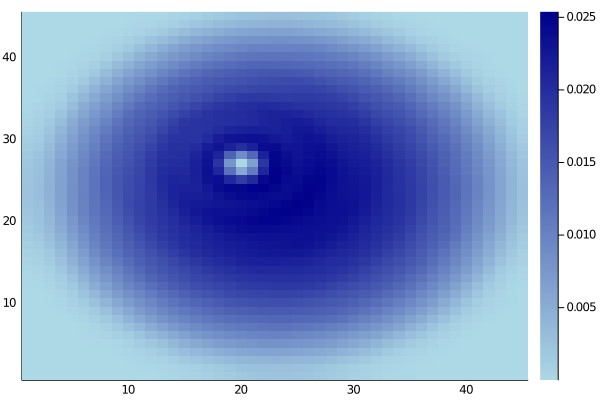

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)